# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview

mouse_complete=pd.merge(mouse_metadata, study_results, how='right',on='Mouse ID')
mouse_complete


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [119]:
# Checking the number of mice.
total_mice=mouse_complete['Mouse ID'].nunique()
total_mice



249

In [120]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

data_duplicate=mouse_complete.loc[mouse_complete.duplicated(['Mouse ID', 'Timepoint'], keep=False),'Mouse ID'].unique()
data_duplicate

array(['g989'], dtype=object)

In [121]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate=mouse_complete.loc[mouse_complete["Mouse ID"] == "g989"]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [122]:
clean_mouse=mouse_complete[mouse_complete['Mouse ID'].isin(data_duplicate)==False]
clean_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [123]:
# Checking the number of mice in the clean DataFrame.
new_total_mice=clean_mouse['Mouse ID'].nunique()
new_total_mice

248

## Summary Statistics

In [124]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor=clean_mouse.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_tumor=clean_mouse.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance_tumor=clean_mouse.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std_tumor=clean_mouse.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem_tumor=clean_mouse.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']


summary=pd.DataFrame({
    'Mean Tumor Volume':mean_tumor,
    'Median Tumor Volume':median_tumor,
    'Tumor Volume Variance':variance_tumor,
    'Tumor Volume Std.Dev':std_tumor,
    'Tumor Volume Std.Err':sem_tumor
})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [125]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary=clean_mouse.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

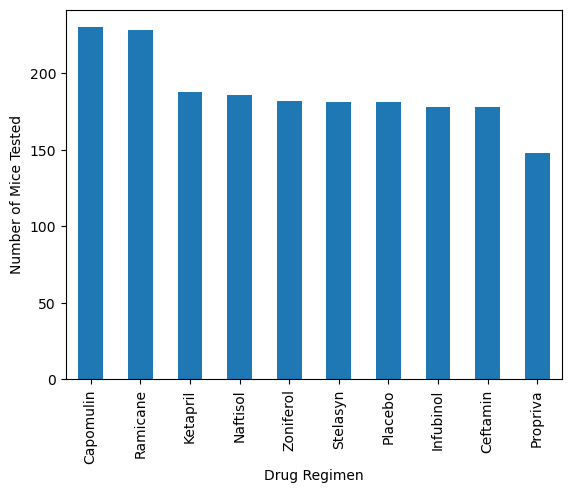

In [126]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

counts = clean_mouse['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

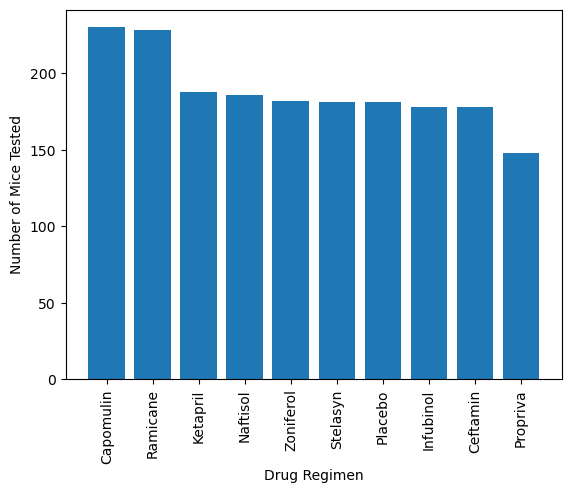

In [127]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = clean_mouse['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

<AxesSubplot:ylabel='Sex'>

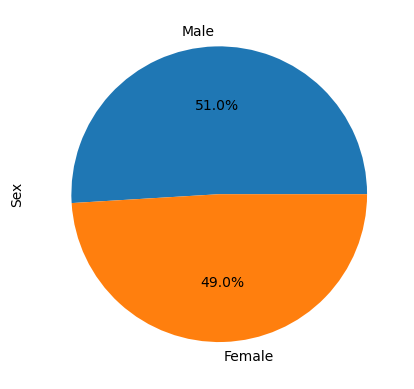

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

counts = clean_mouse['Sex'].value_counts()
counts.plot(kind='pie',autopct='%1.1f%%')

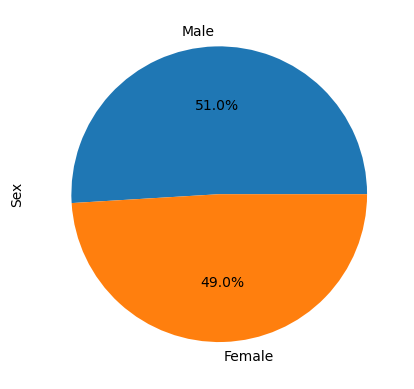

In [129]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [130]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor=clean_mouse.groupby(['Mouse ID'])['Timepoint'].max()
tumor=tumor.reset_index()
tumor
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_merge=tumor.merge(clean_mouse,how='left', on=['Mouse ID', 'Timepoint'])
tumor_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [131]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treat in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    results=tumor_merge.loc[tumor_merge['Drug Regimen']== treat, 'Tumor Volume (mm3)']

    # add subset 
    tumor_vol_data.append(results)
    
    # Determine outliers using upper and lower bounds
    
    quartiles=results.quantile([.25,.5,.75])
    lower=quartiles[.25]
    upper=quartiles[.75]

    iqr=upper-lower
    lower=lower-(1.5*iqr)
    upper=upper+(1.5*iqr)

    outliers = results[(results < lower) | (results > upper)]

    print(f' {treat} potential outliers {outliers}')





 Capomulin potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
 Ramicane potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
 Infubinol potential outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
 Ceftamin potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


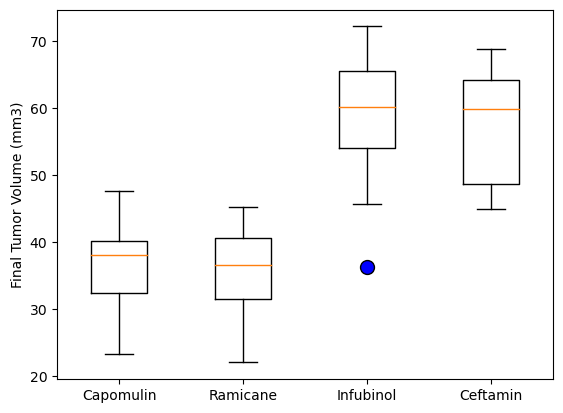

In [132]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

colour_dict=dict(markerfacecolor = 'blue', markersize=10)
plt.boxplot(tumor_vol_data, labels=treatments, flierprops= colour_dict)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [133]:
capomulin_table = clean_mouse.loc[clean_mouse["Drug Regimen"]=="Capomulin"]
capomulin_table.head()
mouseB742 = capomulin_table.loc[capomulin_table["Mouse ID"]=='b742']
mouseB742

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
229,b742,Capomulin,Male,7,21,0,45.000000,0
327,b742,Capomulin,Male,7,21,5,41.534097,0
682,b742,Capomulin,Male,7,21,10,41.999228,0
839,b742,Capomulin,Male,7,21,15,39.524843,0
935,b742,Capomulin,Male,7,21,20,37.950355,0
1224,b742,Capomulin,Male,7,21,25,38.617684,0
1308,b742,Capomulin,Male,7,21,30,39.167949,0
1614,b742,Capomulin,Male,7,21,35,39.847576,0
1676,b742,Capomulin,Male,7,21,40,38.255627,0
1829,b742,Capomulin,Male,7,21,45,38.939633,0


Text(0.5, 1.0, 'Capomulin treatment of mouse b742')

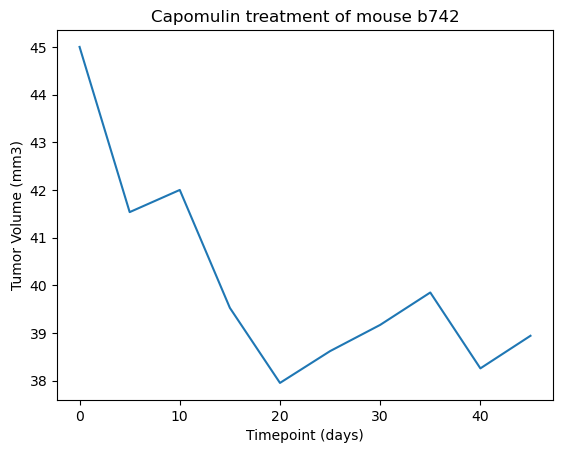

In [134]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

plt.plot(mouseB742['Timepoint'],mouseB742['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.title('Capomulin treatment of mouse b742')

In [135]:
capomulin_avg = capomulin_table.groupby(["Mouse ID"]).mean()
capomulin_avg

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


In [138]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.ylabel('Average Tumor Volume(mm3)')
plt.xlabel('Weight (g)')

SyntaxError: invalid syntax (3012692618.py, line 3)

## Correlation and Regression

Text(0.5, 0, 'Weight (g)')

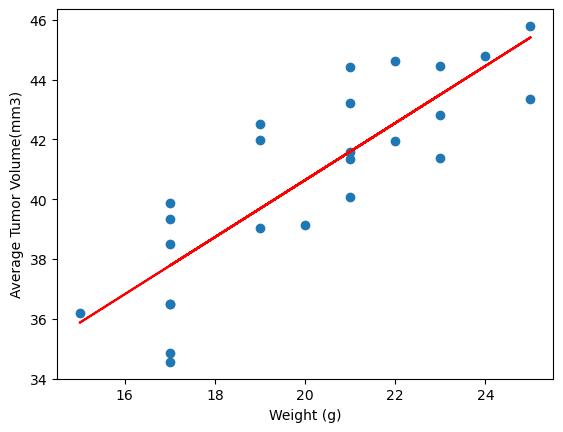

In [140]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)
print=(f"correlation for mouse weight and average tumor volume for the Capomulin regimen is{corr}")
model=st.linregress(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])

y_values=capomulin_avg['Weight (g)']*model[0]+model[1]
plt.plot(capomulin_avg['Weight (g)'], y_values,color="red")

plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.ylabel('Average Tumor Volume(mm3)')
plt.xlabel('Weight (g)')